In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
data = pd.read_csv('housing.csv')
required_columns = [
    'longitude', 'latitude', 'housing_median_age', 'total_rooms',
    'total_bedrooms', 'population', 'households', 'median_income',
    'median_house_value'
]
data = data[required_columns]
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


<AxesSubplot:>

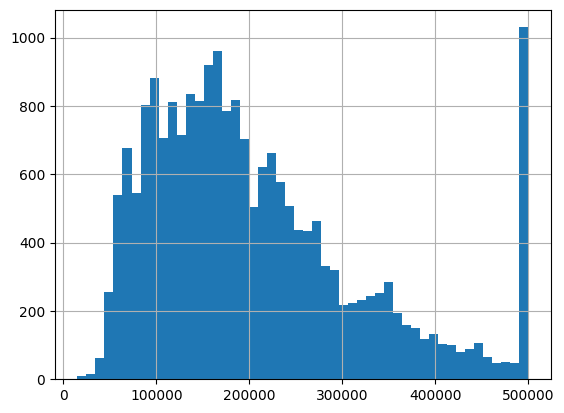

In [3]:
# median_house_value has a long tail.
data['median_house_value'].hist(bins=50)

## Question 1
Find a feature with missing values. How many missing values does it have?
* 207
* 307
* 408
* 508

In [4]:
s = data.isnull().sum()
features_with_missing = s[s != 0]
print(features_with_missing)

total_bedrooms    207
dtype: int64


## Question 2
What's the median (50% percentile) for variable 'population'?
* 1133
* 1122
* 1166
* 1188


In [5]:
print(data.population.median())

1166.0


# Exploratory Data Analysis


In [6]:
# describe all columns
for column in data.columns:
    print("------------>")
    print(f"Column: '{column}' ({data.dtypes[column]})")
    print(f"Missing values: {data[column].isnull().sum()}")
    print(f"Unique value count: {data[column].nunique()}")
    print(f"Min value: {data[column].min()}, max value: {data[column].max()}")
    value_counts = data[column].value_counts()
    print(f"Top 5 by rate: {list(value_counts.index)[:5]}")
    print(f"Max rate value: {value_counts.index[0]}, min rate value {value_counts.index[-1]}")

    print()

------------>
Column: 'longitude' (float64)
Missing values: 0
Unique value count: 844
Min value: -124.35, max value: -114.31
Top 5 by rate: [-118.31, -118.3, -118.29, -118.27, -118.32]
Max rate value: -118.31, min rate value -123.71

------------>
Column: 'latitude' (float64)
Missing values: 0
Unique value count: 862
Min value: 32.54, max value: 41.95
Top 5 by rate: [34.06, 34.05, 34.08, 34.07, 34.04]
Max rate value: 34.06, min rate value 35.88

------------>
Column: 'housing_median_age' (float64)
Missing values: 0
Unique value count: 52
Min value: 1.0, max value: 52.0
Top 5 by rate: [52.0, 36.0, 35.0, 16.0, 17.0]
Max rate value: 52.0, min rate value 1.0

------------>
Column: 'total_rooms' (float64)
Missing values: 0
Unique value count: 5926
Min value: 2.0, max value: 39320.0
Top 5 by rate: [1527.0, 1613.0, 1582.0, 2127.0, 1717.0]
Max rate value: 1527.0, min rate value 10035.0

------------>
Column: 'total_bedrooms' (float64)
Missing values: 207
Unique value count: 1923
Min value: 1.0

----------->
Target: 'median_house_value'
Skewness: 0.9776922140978416
Kurtosis: 0.3275001388119616


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

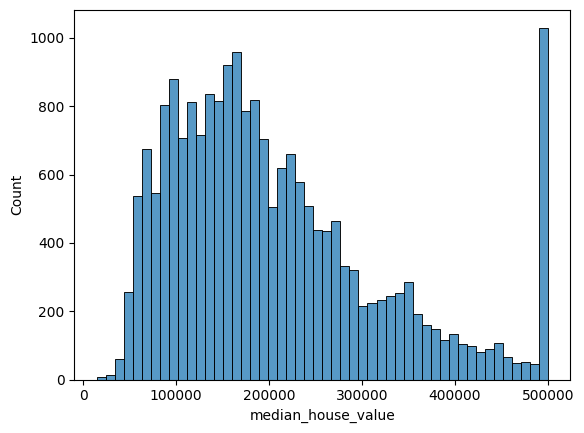

In [7]:
# describe target column
target_name = 'median_house_value'
print("----------->")
print(f"Target: '{target_name}'")
print(f"Skewness: {scipy.stats.skew(data[target_name])}")
print(f"Kurtosis: {scipy.stats.kurtosis(data[target_name])}")
sns.histplot(data[target_name], bins=50)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

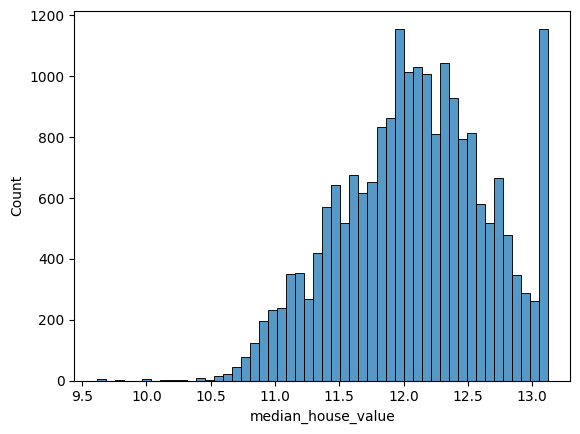

In [8]:
# Long-tail distributions usually confuse the ML models,
# so the recommendation is to transform the target variable distribution
# to a normal one whenever possible.
price_log = np.log1p(data[target_name])
sns.histplot(price_log, bins=50)

## Split the data
Shuffle the initial dataset, use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Make sure that the target value ('median_house_value') is not in your dataframe.
Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [9]:
def split_data(df, random_seed):
    n = len(df)
    n_val = int(n*0.2)
    n_test = int(n*0.2)
    n_train = n - n_val - n_test

    idx = np.arange(0, n)
    np.random.seed(random_seed)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    y_train = np.log1p(df_train[target_name].values)
    y_val = np.log1p(df_val[target_name].values)
    y_test = np.log1p(df_test[target_name].values)
    del df_train[target_name]
    del df_val[target_name]
    del df_test[target_name]

    return (
        (df_train, y_train),
        (df_val, y_val),
        (df_test, y_test),
    )

In [10]:
(
(data_train, y_train),
(data_val, y_val),
(data_test, y_test),
) = split_data(data, 42)

## Question 3
* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

In [11]:
def train_linear_regression(X, y, ridge_alpha=None):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    if ridge_alpha is not None:
        XTX = XTX + ridge_alpha * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

def _fillna_by_mean(df):
    missing_features = df.isnull().sum()
    for feature in missing_features[missing_features != 0].index.tolist():
        mean  = df[feature].mean()
        df[feature] = df[feature].fillna(mean)
    return df


def prepare_X(df, features, fillna_mode):
    if features is None:
        features = df.columns.tolist()
    df = df[features]
    if fillna_mode == 'zero':
        df = df.fillna(0)
    elif fillna_mode == 'mean':
        df = _fillna_by_mean(df)
    X = df.values
    return X

fillna_mode='zero': RMSE=0.33


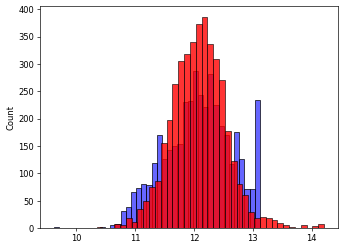

fillna_mode='mean': RMSE=0.33


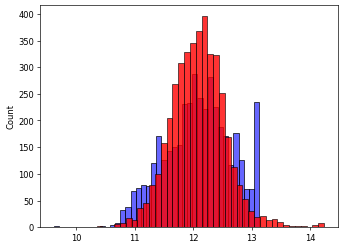

In [12]:
for fillna_mode in ['zero', 'mean']:
    w0, w = train_linear_regression(prepare_X(data_train, None, fillna_mode), y_train)
    y_pred = w0 + prepare_X(data_val, None, fillna_mode).dot(w)
    print(f'{fillna_mode=}: RMSE={round(rmse(y_val, y_pred), 2)}')
    plt.figure(dpi=60)
    sns.histplot(y_val, label='target', color='blue', alpha=0.6, bins=40)
    sns.histplot(y_pred, label='prediction', color='red', alpha=0.8, bins=40)
    plt.show()

## Question 4
* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?

In [13]:
ridge_alphas = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
X = prepare_X(data_train, None, 'zero')
rmse_by_ridge_alpha = []
for ridge_alpha in ridge_alphas:
    w0, w = train_linear_regression(X, y_train, ridge_alpha)
    y_pred = w0 + prepare_X(data_val, None, fillna_mode).dot(w)
    rmse_ = round(rmse(y_val, y_pred), 2)
    rmse_by_ridge_alpha.append((ridge_alpha, rmse_))
    print(f'{ridge_alpha=}: RMSE={rmse_}')

ridge_alpha=0: RMSE=0.33
ridge_alpha=1e-06: RMSE=0.33
ridge_alpha=0.0001: RMSE=0.33
ridge_alpha=0.001: RMSE=0.33
ridge_alpha=0.01: RMSE=0.33
ridge_alpha=0.1: RMSE=0.33
ridge_alpha=1: RMSE=0.33
ridge_alpha=5: RMSE=0.34
ridge_alpha=10: RMSE=0.34


In [14]:
rmse_by_ridge_alpha.sort(key=lambda v: (v[1], v[0]))
print("Q4:", rmse_by_ridge_alpha[0][0])

Q4: 0


## Question 5
* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

In [15]:
random_seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_by_random_seed = []
for random_seed in random_seeds:
    (
        (data_train, y_train),
        (data_val, y_val),
        (data_test, y_test),
    ) = split_data(data, random_seed)
    X = prepare_X(data_train, None, 'zero')
    w0, w = train_linear_regression(X, y_train, None)
    y_pred = w0 + prepare_X(data_val, None, 'zero').dot(w)
    rmse_ = rmse(y_pred, y_val)
    rmse_by_random_seed.append((random_seed, rmse_))

In [16]:
print("Q5:", round(np.std([v[1] for v in rmse_by_random_seed]), 3))

Q5: 0.004


## Question 6
* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

In [17]:
(
    (data_train, y_train),
    (data_val, y_val),
    (data_test, y_test),
) = split_data(data, 9)
data_train2  = pd.concat([data_train, data_val])
y_train2 = np.concatenate([y_train, y_val])
X = prepare_X(data_train2, None, 'zero')
w0, w = train_linear_regression(X, y_train2, ridge_alpha=0.001)
y_pred = w0 + X.dot(w)
print(f"Q6:", rmse(y_pred, y_train2))

Q6: 0.3397763880121206
